<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/opendata1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# オープンデータの活用(1)
気象庁のデータの可視化，具体的には折れ線グラフ化を試みる

### 気象庁の提供するデータの形式 (CSV)：
```
ダウンロードした時刻：2020/05/30 14:07:33

,京都,京都,京都,京都,京都,京都,京都,京都,京都
年月日,平均気温(℃),平均気温(℃),平均気温(℃),最高気温(℃),最高気温(℃),最高気温(℃),最低気温(℃),最低気温(℃),最低気温(℃)
,,,,,,,,,
,,品質情報,均質番号,,品質情報,均質番号,,品質情報,均質番号
2016/1/1,5.7,8,1,10.6,8,1,2.1,8,1
2016/1/2,6.7,8,1,12.9,8,1,1.8,8,1
2016/1/3,9.3,8,1,15.8,8,1,4.7,8,1
2016/1/4,10.2,8,1,16.0,8,1,5.3,8,1
```



## 最初に Google Drive のマウント

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## CSV モジュールを用いてデータ読み込み／matplotlib モジュール用いた可視化

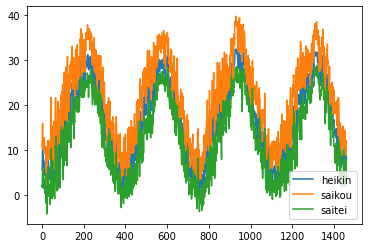

In [4]:
import csv
import matplotlib.pyplot as plt

'''
気象庁のデータを用いた可視化
'''
f = open("/content/drive/My Drive/BASE2/OpenData/data-kyoto.csv", "r", encoding="shiftjis")
reader = csv.reader(f)

# ヘッダ部を読み飛ばす
for i in range(6):
	next(reader)

# データ格納用のリストを準備
date = []	# 日付
heikin = []	#平均気温
saikou = [] #最高気温
saitei = []	# 最低気温

# CSV ファイルからデータ読み込み
for row in reader:
	date.append(row[0])
	heikin.append(float(row[1]))
	saikou.append(float(row[4]))
	saitei.append(float(row[7]))

f.close()

# 平均気温，最高気温，最低気温
plt.plot(heikin, label="heikin")
plt.plot(saikou, label="saikou")
plt.plot(saitei, label="saitei")
plt.legend() # 凡例の表示
plt.show()


## Pandas モジュールを用いたデータ読み込み／可視化

            heikin  saikou  saitei
2016-01-01     5.7    10.6     2.1
2016-01-02     6.7    12.9     1.8
2016-01-03     9.3    15.8     4.7
2016-01-04    10.2    16.0     5.3
2016-01-05     8.2    12.2     4.9
...            ...     ...     ...
2019-12-27     8.2    11.5     3.7
2019-12-28     5.7     8.9     3.2
2019-12-29     7.4    12.1     2.2
2019-12-30     9.7    11.5     7.6
2019-12-31     8.1    12.0     3.8

[1461 rows x 3 columns]


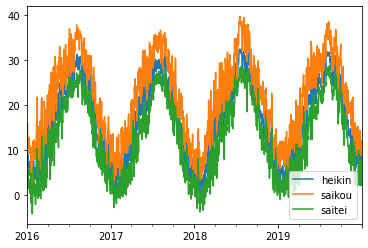

In [5]:
'''
気象庁のデータを用いた可視化
'''
import pandas as pd
import matplotlib.pyplot as plt

# CSV ファイルからデータ読み込み
df = pd.read_csv("/content/drive/My Drive/BASE2/OpenData/data-kyoto.csv",
				 index_col=0, # 日付をインデックスとする
				 skiprows=[0,1,2,3,4], # 気色悪いヘッダだから「ヘッダ部をスキップする」形をとる
				 encoding="shift-jis") # 気象庁の提供するデータのエンコードは Shift JIS

# インデックス列を datetime フォーマットへ変換
df.index = pd.to_datetime(df.index, format="%Y/%m/%d")

# 平均気温，最高気温，最低気温の列のみ取り出す
df = df.iloc[:, [0, 3, 6]]

# 各列のラベルの設定
df.columns = ["heikin", "saikou", "saitei"]
print(df)

# 折れ線グラフの描画
df.plot()
plt.show()